In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

In [16]:
transactions = pd.read_csv('C:/Users/91701/Downloads/Transactions.csv')
products = pd.read_csv('C:/Users/91701/Downloads/Products.csv')
customers = pd.read_csv('C:/Users/91701/Downloads/Customers.csv')

In [17]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [18]:
transactions_products = pd.merge(transactions, products, on='ProductID', how='left')
full_data = pd.merge(transactions_products, customers, on='CustomerID', how='left')

In [26]:
full_data.to_csv('fd.csv')

In [27]:
# Group by category and count unique customers
category_customers = full_data.groupby('Category')['CustomerID'].nunique().reset_index()
category_customers = category_customers.rename(columns={'CustomerID': 'UniqueCustomers'})

In [20]:
transactions_by_month = full_data.groupby(full_data['TransactionDate'].dt.to_period('M')).size()

In [21]:
top_categories = full_data['Category'].value_counts()


In [22]:
top_regions = full_data['Region'].value_counts()

In [23]:
plt.figure(figsize=(15, 6))

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [19]:
print("Transactions Dataset:")
print(transactions.info())
print("\nProducts Dataset:")
print(products.info())
print("\nCustomers Dataset:")
print(customers.info())

print("\nMerged Dataset:")
print(full_data.info())
print(full_data.head())

Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     1

In [28]:
category_customers = category_customers.sort_values(by='UniqueCustomers', ascending=False)
category_customers

,Category,UniqueCustomers
0,Books,154
2,Electronics,140
3,Home Decor,138
1,Clothing,135


In [31]:
category_counts = full_data['Category'].value_counts()

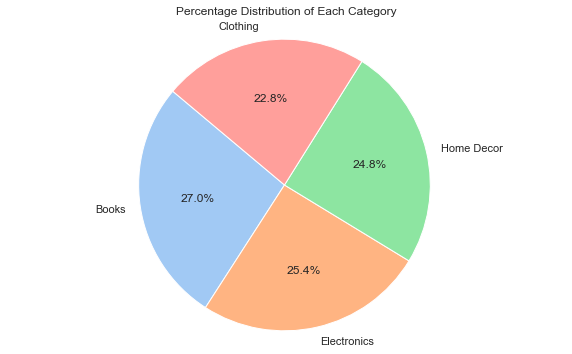

In [32]:
category_percentage = 100 * category_counts / category_counts.sum()

# Plot the percentage distribution as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(category_percentage, labels=category_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Each Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

C:\Users\91701\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\91701\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\91701\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


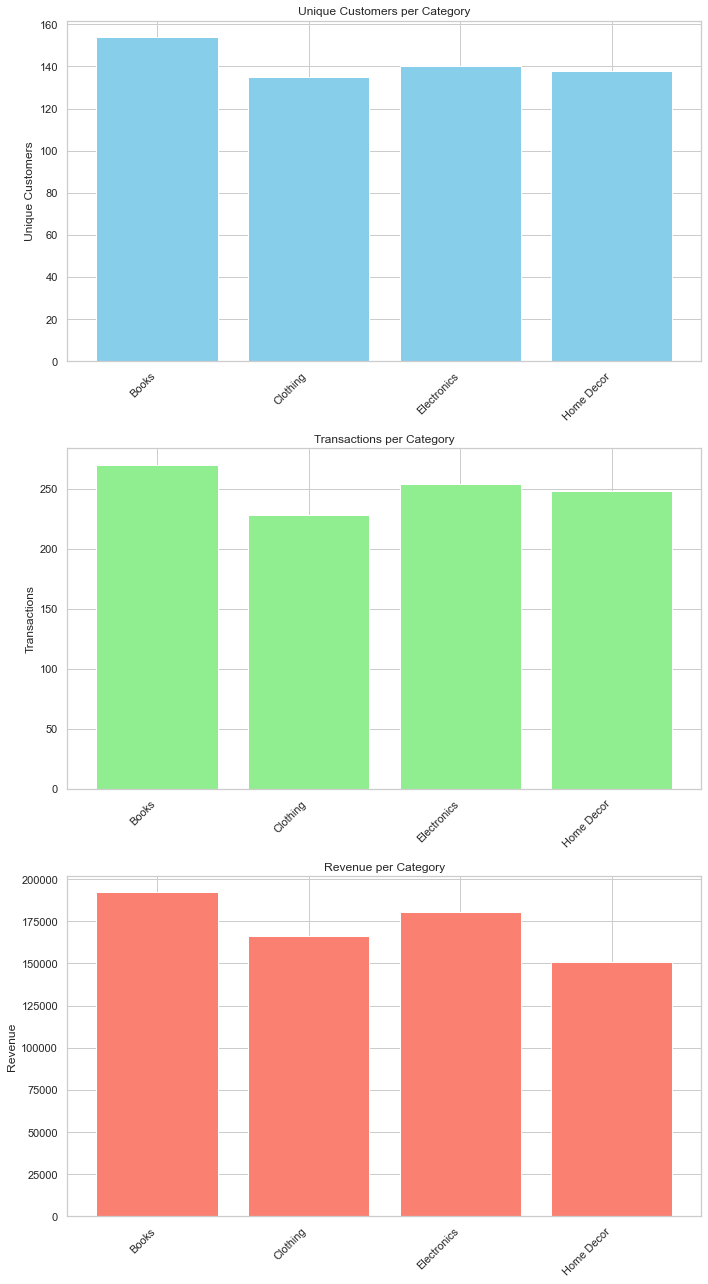

In [36]:
# Calculate the number of unique customers per category
customers_per_category = full_data.groupby('Category')['CustomerID'].nunique().reset_index()
customers_per_category = customers_per_category.rename(columns={'CustomerID': 'UniqueCustomers'})

# Calculate the number of transactions per category
transactions_per_category = full_data['Category'].value_counts().reset_index()
transactions_per_category.columns = ['Category', 'Transactions']
# Calculate the total revenue per category
revenue_per_category = full_data.groupby('Category')['TotalValue'].sum().reset_index()
# Merge the dataframes
summary = pd.merge(customers_per_category, transactions_per_category, on='Category')
summary = pd.merge(summary, revenue_per_category, on='Category')
# Plotting the data
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))
# Plot number of unique customers per category
axes[0].bar(summary['Category'], summary['UniqueCustomers'], color='skyblue')
axes[0].set_title('Unique Customers per Category')
axes[0].set_ylabel('Unique Customers')
axes[0].set_xticklabels(summary['Category'], rotation=45, ha="right")
# Plot number of transactions per category
axes[1].bar(summary['Category'], summary['Transactions'], color='lightgreen')
axes[1].set_title('Transactions per Category')
axes[1].set_ylabel('Transactions')
axes[1].set_xticklabels(summary['Category'], rotation=45, ha="right")
# Plot total revenue per category
axes[2].bar(summary['Category'], summary['TotalValue'], color='salmon')
axes[2].set_title('Revenue per Category')
axes[2].set_ylabel('Revenue')
axes[2].set_xticklabels(summary['Category'], rotation=45, ha="right")

plt.tight_layout()
plt.show()

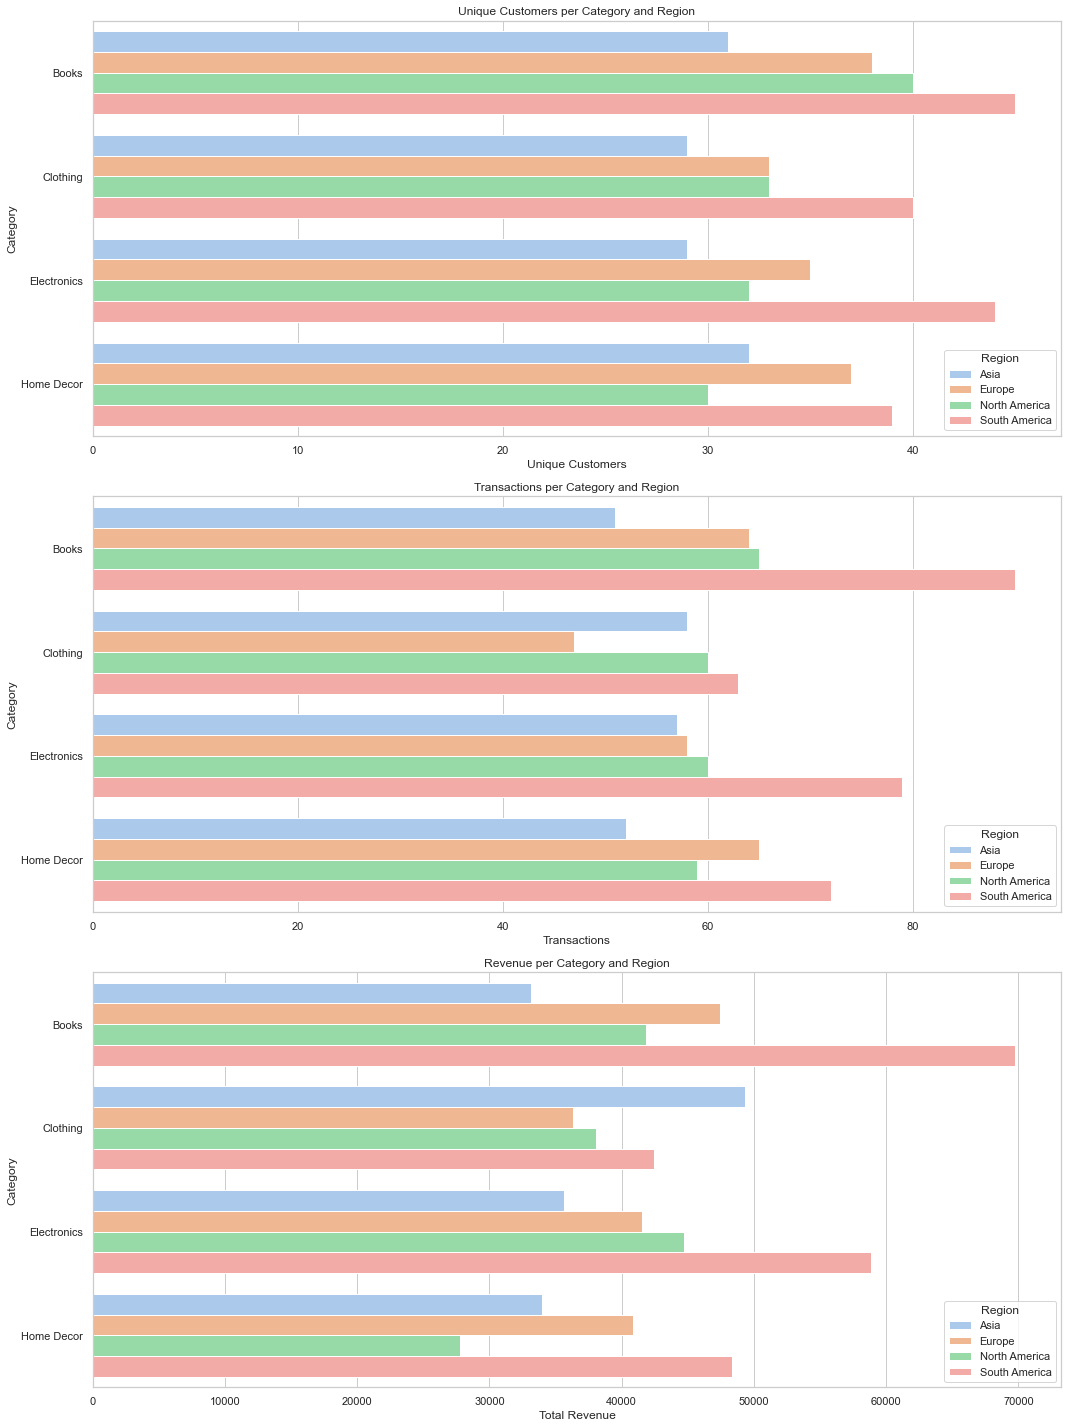

In [37]:
# Calculate the number of unique customers per category and region
customers_summary = full_data.groupby(['Category', 'Region'])['CustomerID'].nunique().reset_index()
customers_summary.columns = ['Category', 'Region', 'UniqueCustomers']

# Calculate the number of transactions per category and region
transactions_summary = full_data.groupby(['Category', 'Region']).size().reset_index(name='Transactions')

# Calculate the total revenue per category and region
revenue_summary = full_data.groupby(['Category', 'Region'])['TotalValue'].sum().reset_index()
revenue_summary.columns = ['Category', 'Region', 'TotalRevenue']

# Merge the summaries into a single DataFrame
summary = pd.merge(customers_summary, transactions_summary, on=['Category', 'Region'])
summary = pd.merge(summary, revenue_summary, on=['Category', 'Region'])

# Plotting the data
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

# Plot number of unique customers per category and region
sns.barplot(x='UniqueCustomers', y='Category', hue='Region', data=summary, ax=axes[0])
axes[0].set_title('Unique Customers per Category and Region')
axes[0].set_xlabel('Unique Customers')
axes[0].set_ylabel('Category')
axes[0].legend(title='Region')

# Plot number of transactions per category and region
sns.barplot(x='Transactions', y='Category', hue='Region', data=summary, ax=axes[1])
axes[1].set_title('Transactions per Category and Region')
axes[1].set_xlabel('Transactions')
axes[1].set_ylabel('Category')
axes[1].legend(title='Region')

# Plot total revenue per category and region
sns.barplot(x='TotalRevenue', y='Category', hue='Region', data=summary, ax=axes[2])
axes[2].set_title('Revenue per Category and Region')
axes[2].set_xlabel('Total Revenue')
axes[2].set_ylabel('Category')
axes[2].legend(title='Region')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

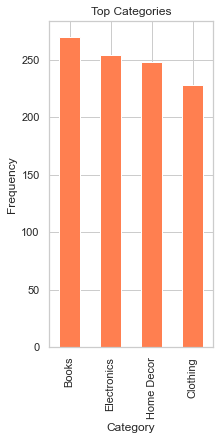

In [24]:
plt.subplot(1, 3, 2)
top_categories.plot(kind="bar", title="Top Categories", color="coral")
plt.xlabel("Category")
plt.ylabel("Frequency")

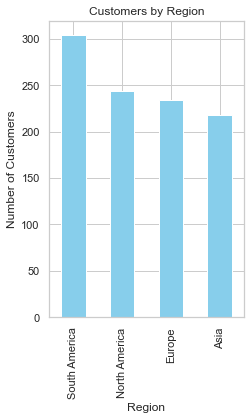

In [15]:
plt.subplot(1, 3, 3)
top_regions.plot(kind="bar", title="Customers by Region", color="skyblue")
plt.xlabel("Region")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()

In [16]:
print("\nBusiness Insights:")
print("1. Transactions peaked in January 2024 (107 transactions) and were lowest in December 2023 (4 transactions). Early and mid-year show more activity.")
print("2. 'Books' is the most purchased category (270 transactions), followed by Electronics (254) and Home Decor (248). Clothing also shows strong demand (228).")
print("3. South America leads in customer count (304 customers), followed by North America (244) and Europe (234). Asia represents the smallest region (218).")


Business Insights:
1. Transactions peaked in January 2024 (107 transactions) and were lowest in December 2023 (4 transactions). Early and mid-year show more activity.
2. 'Books' is the most purchased category (270 transactions), followed by Electronics (254) and Home Decor (248). Clothing also shows strong demand (228).
3. South America leads in customer count (304 customers), followed by North America (244) and Europe (234). Asia represents the smallest region (218).
